In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
listing = pd.read_csv('listings-2.csv')

In [3]:
review = pd.read_csv('reviews-2.csv')

In [4]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
review.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

### Data Cleaning

In [6]:
listing.drop(columns = ['listing_url', 'scrape_id', 'last_scraped', 'source','host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_has_profile_pic','bathrooms_text', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 
                       'host_verifications','neighbourhood_group_cleansed', 'calendar_updated', 'neighbourhood','has_availability' ], inplace = True)

In [7]:
review.dropna(subset='comments', inplace= True)

In [8]:
listing.dropna(subset = ['review_scores_rating'], inplace = True)

In [9]:
listing.dropna(subset = ['room_type', 'property_type', 'accommodates', 'bedrooms', 'bathrooms',
    'beds', 'host_is_superhost', 'review_scores_rating', 'number_of_reviews'], inplace = True)

In [10]:
listing['price'].replace({'\$':''},regex= True, inplace=True)

/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/2528127588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing['price'].replace({'\$':''},regex= True, inplace=True)


In [11]:
listing['price'] = pd.to_numeric(listing['price'], errors='coerce')

In [12]:
listing.dropna(subset = ['price'], inplace = True)

In [13]:
listing['instant_bookable'].replace({'t':1, 'f':0}, inplace = True)

/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/1962542886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing['instant_bookable'].replace({'t':1, 'f':0}, inplace = True)
/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/1962542886.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

In [14]:
listing['host_identity_verified'].replace({'t':1, 'f':0}, inplace = True)

/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/3864984280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing['host_identity_verified'].replace({'t':1, 'f':0}, inplace = True)
/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/3864984280.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

In [15]:
listing['host_is_superhost'].replace({'t':1, 'f':0}, inplace = True)

/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/3694597828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing['host_is_superhost'].replace({'t':1, 'f':0}, inplace = True)
/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/3694597828.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

In [16]:
listing['review_scores_accuracy'].fillna(listing['review_scores_accuracy'].mean(), inplace = True)

/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/3853786937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing['review_scores_accuracy'].fillna(listing['review_scores_accuracy'].mean(), inplace = True)


In [17]:
listing['host_identity_verified'].fillna(0,inplace = True)

In [18]:
listing['review_scores_cleanliness'].fillna(listing['review_scores_cleanliness'].mean(), inplace = True)
listing['review_scores_cleanliness'].fillna(listing['review_scores_cleanliness'].mean(), inplace = True)
listing['review_scores_checkin'].fillna(listing['review_scores_checkin'].mean(), inplace = True)
listing['review_scores_communication'].fillna(listing['review_scores_communication'].mean(), inplace = True)
listing['review_scores_location'].fillna(listing['review_scores_location'].mean(), inplace = True)
listing['review_scores_value'].fillna(listing['review_scores_value'].mean(), inplace = True)


/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/3129606168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing['review_scores_cleanliness'].fillna(listing['review_scores_cleanliness'].mean(), inplace = True)
/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/3129606168.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the

In [19]:
listing['bedrooms'].fillna(listing.groupby('accommodates')['bedrooms'].transform(lambda x: x.mean().round()), inplace = True)
listing['bathrooms'].fillna(listing.groupby('accommodates')['bathrooms'].transform(lambda x: x.mean().round()), inplace = True)
listing['beds'].fillna(listing.groupby('accommodates')['beds'].transform(lambda x: x.mean().round()), inplace = True)


/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/2185801984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing['bedrooms'].fillna(listing.groupby('accommodates')['bedrooms'].transform(lambda x: x.mean().round()), inplace = True)
/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/2185801984.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will n

## Visualisation (EDA)

In [20]:
import seaborn as sns

### Price Distribution 

<Axes: xlabel='price', ylabel='Count'>

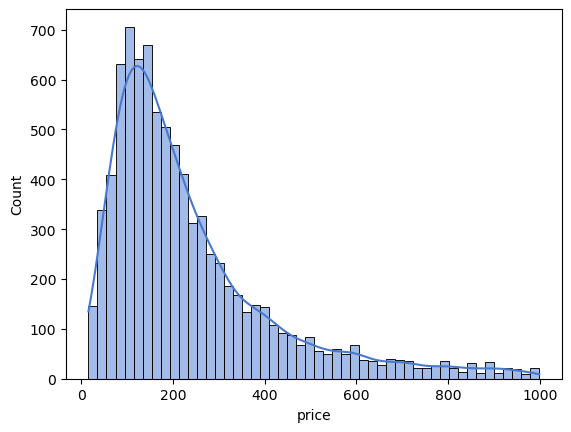

In [21]:
sns.histplot(listing['price'], bins = 50, kde= True,color=sns.color_palette("muted")[0])

### Room Type vs Price

<Axes: xlabel='bedrooms', ylabel='price'>

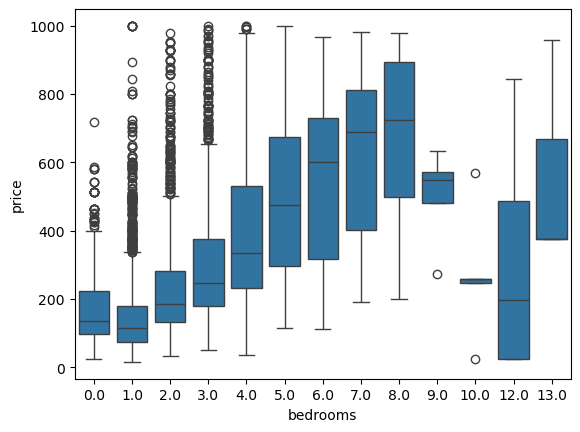

In [22]:
sns.boxplot(x = listing['bedrooms'], y = listing['price'])

### SuperHost review

<Axes: xlabel='host_is_superhost', ylabel='estimated_occupancy_l365d'>

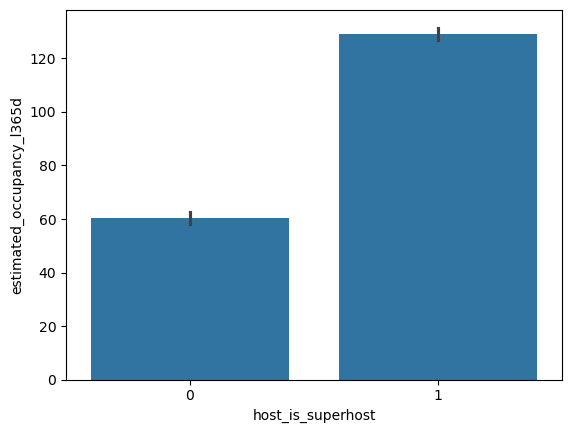

In [23]:
sns.barplot(x = listing['host_is_superhost'],y=listing['estimated_occupancy_l365d'])

<Axes: xlabel='instant_bookable', ylabel='estimated_occupancy_l365d'>

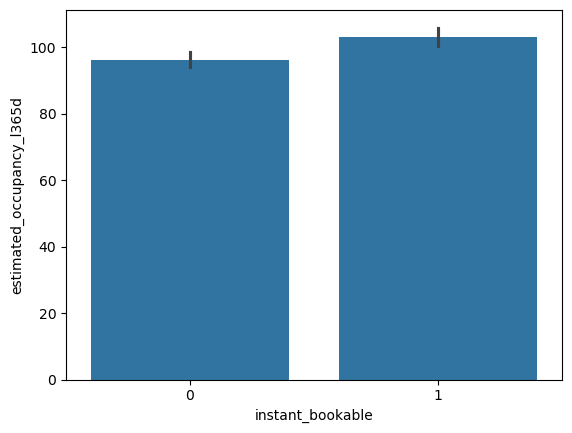

In [24]:
sns.barplot(x = listing['instant_bookable'],y=listing['estimated_occupancy_l365d'])


<Axes: xlabel='host_identity_verified', ylabel='review_scores_rating'>

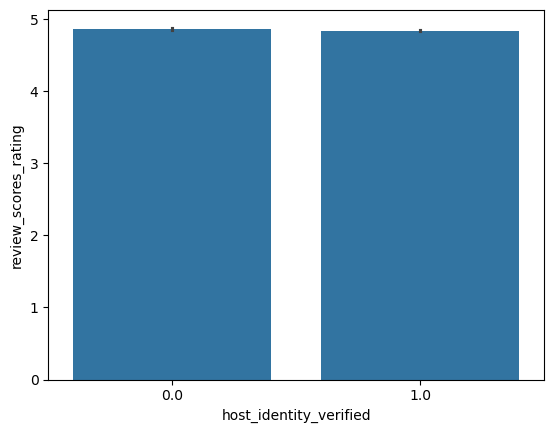

In [25]:
sns.barplot(x = listing['host_identity_verified'], y = listing['review_scores_rating'])

### Revenue vs reviews

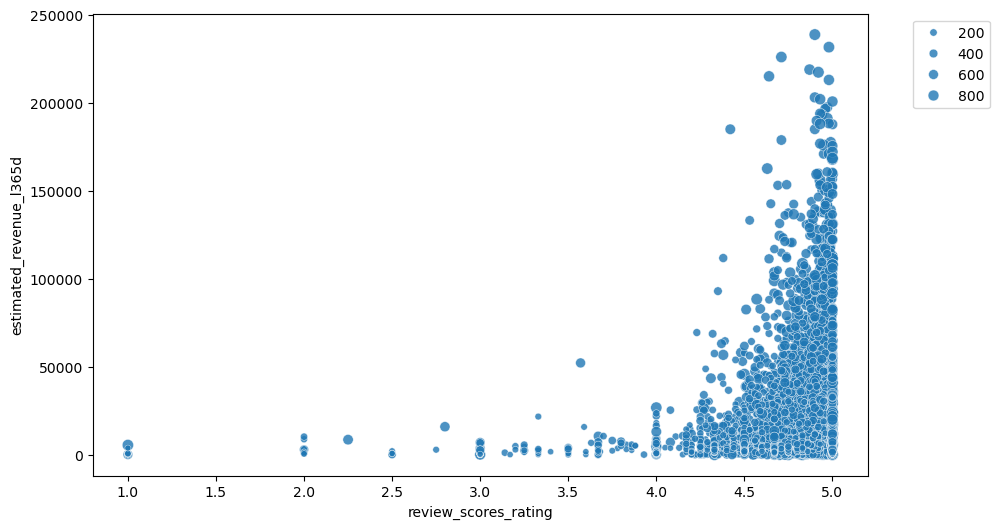

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    x='review_scores_rating', 
    y='estimated_revenue_l365d', 
    size='price',  
    data=listing, 
    alpha=0.8
)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Occupancy vs Revenue

<Axes: xlabel='estimated_occupancy_l365d', ylabel='estimated_revenue_l365d'>

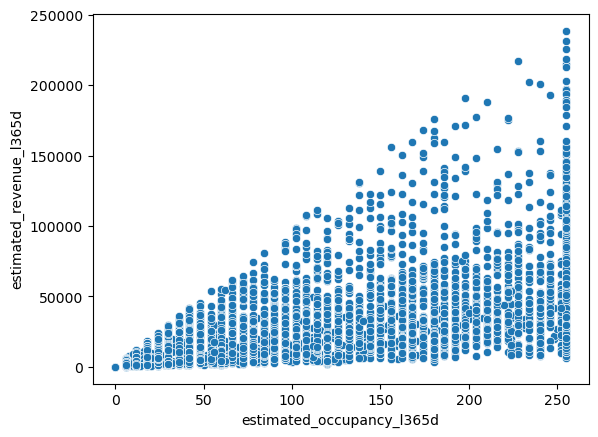

In [27]:
sns.scatterplot(x = listing['estimated_occupancy_l365d'], y = listing['estimated_revenue_l365d'])

### Number of review vs price

<Axes: xlabel='number_of_reviews', ylabel='price'>

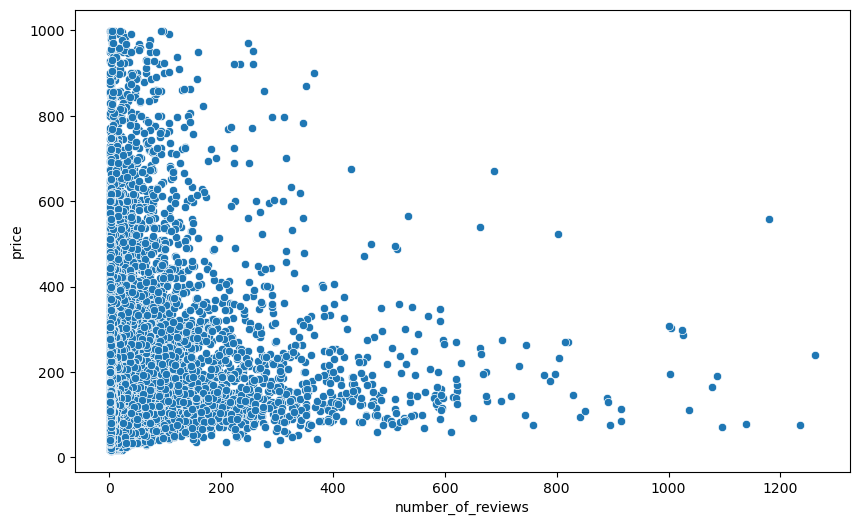

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = listing['number_of_reviews'], y = listing['price'])


### Reveiw score rating vs number of reviews

<Axes: xlabel='review_scores_rating', ylabel='number_of_reviews'>

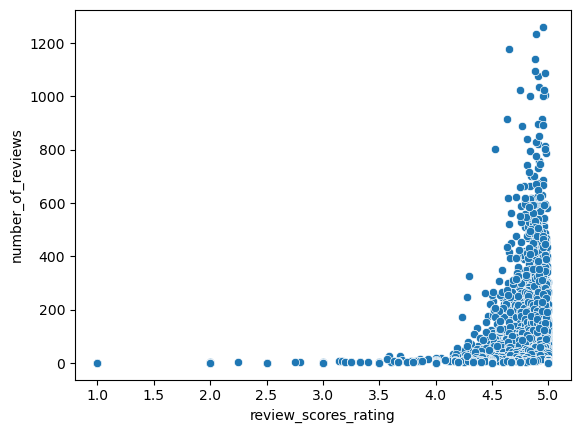

In [29]:
sns.scatterplot(x = listing['review_scores_rating'], y = listing['number_of_reviews'])

In [37]:
'''
for i in listing.columns:
    if 'neighbour' in i.lower():
        print(i)
'''
y = []
for i in listing.columns:
    print(i, '- ', listing[i].dtype)

id -  int64
name -  object
description -  object
neighborhood_overview -  object
picture_url -  object
host_id -  int64
host_url -  object
host_name -  object
host_since -  object
host_location -  object
host_about -  object
host_response_time -  object
host_response_rate -  object
host_acceptance_rate -  object
host_is_superhost -  int64
host_listings_count -  float64
host_total_listings_count -  float64
host_identity_verified -  float64
neighbourhood_cleansed -  int64
latitude -  float64
longitude -  float64
property_type -  object
room_type -  object
accommodates -  int64
bathrooms -  float64
bedrooms -  float64
beds -  float64
amenities -  object
price -  float64
minimum_nights -  int64
maximum_nights -  int64
minimum_minimum_nights -  float64
maximum_minimum_nights -  float64
minimum_maximum_nights -  float64
maximum_maximum_nights -  float64
minimum_nights_avg_ntm -  float64
maximum_nights_avg_ntm -  float64
availability_30 -  int64
availability_60 -  int64
availability_90 -  int

In [81]:
corr = listing[['accommodates', 'bedrooms', 'bathrooms',
    'beds', 'host_is_superhost', 'review_scores_rating', 'number_of_reviews','price', 'neighbourhood_cleansed', 'estimated_revenue_l365d'
]]

<Axes: >

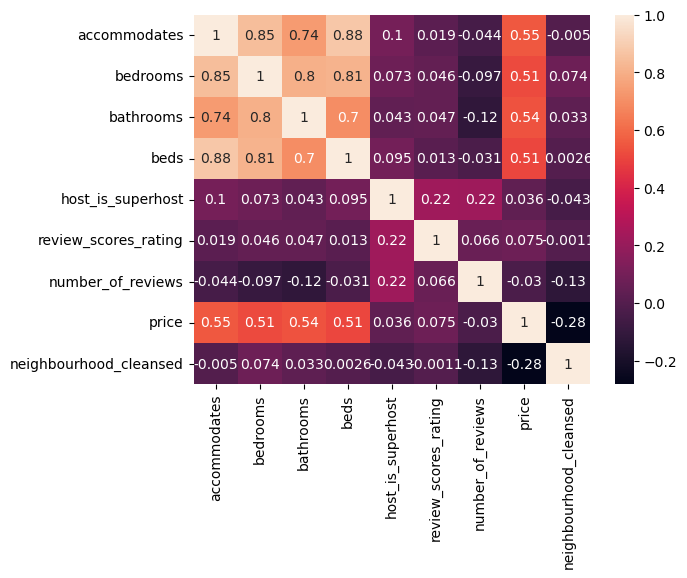

In [78]:
sns.heatmap(corr.corr(), annot= True)

In [45]:
features = [
    'room_type', 'property_type', 
    'accommodates', 'bedrooms', 'bathrooms',
    'beds', 'host_is_superhost', 'review_scores_rating', 'number_of_reviews'
    
]


In [46]:
df = listing[features + ['price']].dropna()

In [47]:
X = df[features]
y = df['price']

In [48]:

categorical_cols = ['room_type', 'property_type', 'host_is_superhost']
numeric_cols = [col for col in features if col not in categorical_cols]


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 96.81843733490078
RMSE: 143.02320500288087
R²: 0.4310942741920848


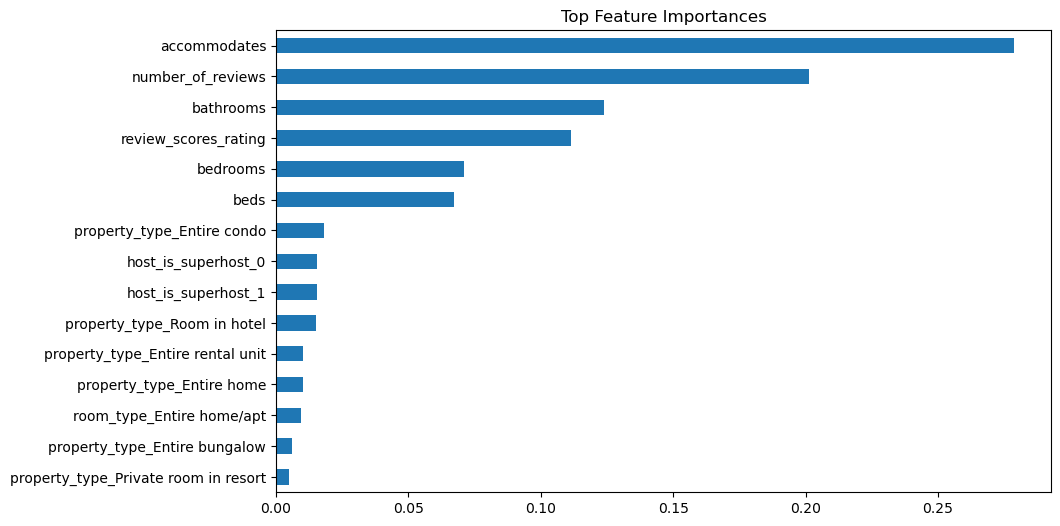

In [50]:
import matplotlib.pyplot as plt


encoded_features = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = np.concatenate([encoded_features, numeric_cols])

importances = model.named_steps['regressor'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

#PLOT
feat_imp.head(15).plot(kind='barh', figsize=(10,6), title='Top Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [51]:
import string
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def extract_features(df1):
    df1['review_length'] = df1['comments'].apply(len)
    df1['word_count'] = df1['comments'].apply(lambda x: len(x.split()))
    df1['punctuation_ratio'] = df1['comments'].apply(lambda x: sum(1 for c in x if c in string.punctuation) / len(x))
    df1['stopword_ratio'] = df1['comments'].apply(lambda x: sum(1 for w in x.lower().split() if w in stop_words) / (len(x.split())+1))
    df1['avg_word_length'] = df1['comments'].apply(lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0)

    # Repeated phrase score (simple)
    def repeated_score(comment):
        words = comment.lower().split()
        return len(words) - len(set(words))
    
    review['repeated_phrase_score'] = review['comments'].apply(repeated_score)
    
    # Time gap between reviews
    df1['date'] = pd.to_datetime(df1['date'])
    df1 = review.sort_values(by=['listing_id', 'date'])
    df1['review_date_gap'] = review.groupby('listing_id')['date'].diff().dt.days.fillna(0)
    
    return df1

df1 = extract_features(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gokulg.s/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
from sklearn.ensemble import IsolationForest

model1 = IsolationForest(contamination=0.05, random_state=42)
df1['anomaly_score'] = model1.fit_predict(df1[['review_length', 'punctuation_ratio', 'stopword_ratio', 
                                            'avg_word_length', 'repeated_phrase_score', 'review_date_gap']])


df1['is_fake_review'] = df1['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)


In [53]:
keys = ['room_type',
    'property_type',
    'accommodates',
    'bedrooms',
    'bathrooms',
    'beds',
    'host_is_superhost',
    'review_scores_rating',
    'number_of_reviews']

In [54]:
def predict_price(input_features: list):
    my_dict = dict(zip(keys, input_features))
    # Convert dict to DataFrame (1-row)
    input_df = pd.DataFrame([my_dict])
    
    # Predict using the trained model pipeline
    predicted_price = model.predict(input_df)[0]
    
    return round(predicted_price, 2)

In [55]:

def gradio_predict(room_type, property_type, accommodates, bedrooms, bathrooms, beds,
                   host_is_superhost, review_scores_rating, number_of_reviews):

    # Convert input to list (order must match your `keys`)
    input_list = [
        room_type,
        property_type,
        int(accommodates),
        float(bedrooms),
        float(bathrooms),
        float(beds),
        host_is_superhost,
        float(review_scores_rating),
        int(number_of_reviews)
    ]
    
    return f"${predict_price(input_list)}"



In [56]:
import gradio as gr
from langchain.schema import SystemMessage

In [57]:
from langchain_community.llms import Ollama
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
import openpyxl
from langchain.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate
from langchain.agents import initialize_agent, AgentType
import os
from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI
from openai import OpenAI

In [58]:
load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')

In [59]:
openai = OpenAI()

In [60]:

llm = ChatOpenAI(model = 'gpt-4o-mini', api_key= api_key, temperature= 0.0)

/var/folders/z1/2kj6d1ld1w5f46gd1x6cqh2m0000gn/T/ipykernel_25299/1631400194.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model = 'gpt-4o-mini', api_key= api_key, temperature= 0.0)


In [61]:

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=[listing,review],
    verbose=False,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    #prefix=system_message,
    allow_dangerous_code= True

)


In [62]:

def chat(message, history):
    result = agent.invoke({"input":message})
    return result['output']

In [63]:
with gr.Blocks() as demo:
    gr.Markdown('''<div style='
    text-align: center; 
    font-size: 32px; 
    font-weight: bold; 
    letter-spacing: 1px; 
    color: #2C3E50;
'>
🏡 AirBnB Price Predictor
</div>
''')
    #gr.Markdown("# 🏡 AirBnB price predictor")
    with gr.Row():
        with gr.Column(scale = 1):
            gr.Interface(
                fn=gradio_predict,
                inputs=[
                    gr.Dropdown(["Entire home/apt", "Private room", "Shared room", "Hotel room"], label="Room Type"),
                    gr.Textbox(label="Property Type (e.g., Apartment, House)"),
                    gr.Number(label="Accommodates"),
                    gr.Number(label="Bedrooms"),
                    gr.Number(label="Bathrooms"),
                    gr.Number(label="Beds"),
                    gr.Radio(["Yes", "No"], label="Is Host Superhost?"),
                    gr.Slider(0.0, 5.0, step=0.1, label="Review Score Rating"),
                    gr.Number(label="Number of Reviews")
                ],
                outputs=gr.Textbox(label="Predicted Price"),
                description="Enter the listing details below"
            )
        with gr.Column(scale = 2):
            gr.ChatInterface(fn = chat, type = "messages", description = 'Chat with AI agnet')
            
demo.launch(share = True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://8c7d266e9f2394782c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
